### 数据描述（**北方华创**）[`002371`]
Stkcd [证券代码] - 以上交所、深交所公布的证券代码为准\
Trddt [交易日期] - 以YYYY-MM-DD表示\
Opnprc [日开盘价] - A股以人民币元计，上海B以美元计，深圳B以港币计\
Hiprc [日最高价] - A股以人民币元计，上海B以美元计，深圳B以港币计\
Loprc [日最低价] - A股以人民币元计，上海B以美元计，深圳B以港币计\
Clsprc [日收盘价] - A股以人民币元计，上海B以美元计，深圳B以港币计\
Dnshrtrd [日个股交易股数] - 0=没有交易量\
Dnvaltrd [日个股交易金额] - A股以人民币元计，上海B以美元计，深圳B以港币计，0=没有交易量

##### 按照授课教师指定的上海证券交易所和深圳证券交易所的1家上市公司，下载2018年10月1日-2023年9月30日的日度交易行情信息：开盘价、最高价、最低价、收盘价和成交量，进行下列数据分析实验：
(1)	画出收盘价的时间序列图。（10分）\
(2)	将收盘价高于开盘价的交易日用1进行标注，其他用0进行标注，给数据增加标签列。（10分）\
(3)	用收盘价计算日度收益率，增加日度收益率这个字段。对数据进行预处理，检查数据是否存在缺失值、无穷大值，将缺失值和无穷大值用0代替。（10分）\
(4)	画出股票日度收益的直方图，分析股票收益分布的特征。（10分）\
(5)	基于7:3的训练集/测试集切分，使用上一个交易日或以前信息，分别用K近邻、决策树、朴素贝叶斯、人工神经网络对下一个交易日股票收盘价是否会高于开盘价进行预测，将收盘价高于开盘价的交易日定义为正类，计算召回率、精度、准确率。要求：除使用下载数据字段作为属性外，自己另外构建2个属性用于预测；说明超参数选择，用测试集展示预测效果。（40分）\
(6)	基于K近邻、决策树、朴素贝叶斯、人工神经网络构建集成分类器，用硬投票对按时间顺序切分的训练集/测试集进行类别预测，并与随机森林预测效果对比。（20分）

In [145]:
# 导入所需要的包
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy import stats
from scipy.stats import norm

In [146]:
# # 显示中文
# font_path = '/workspaces/AllThings/大数据/大作业/SimHei.ttf'
# font_prop = matplotlib.font_manager.FontProperties(fname=font_path)

In [147]:
data = pd.read_csv('./TRD_Dalyr.csv', encoding='utf-8')
data.head()

,Stkcd,Trddt,Opnprc,Hiprc,Loprc,Clsprc,Dnshrtrd
0,2371,2018-10-08,45.60,46.80,45.01,45.36,7250124
1,2371,2018-10-09,45.69,46.17,40.85,41.98,13105888
2,2371,2018-10-10,41.95,43.22,40.70,42.15,10102117
3,2371,2018-10-11,39.99,41.50,38.05,39.23,12596210
4,2371,2018-10-12,39.40,40.78,38.80,40.41,10078339


In [148]:
renames = {
    'Stkcd': 'code',
    'Trddt': 'date',
    'Opnprc': 'open',
    'Hiprc': 'high',
    'Loprc': 'low',
    'Clsprc': 'close',
    'Dnshrtrd': 'volume',
}
data.rename(columns=renames, inplace=True)

In [149]:
data.index = pd.to_datetime(data['date'])
data.drop(['code', 'date'], axis=1, inplace=True)
data.head()

,open,high,low,close,volume
date,,,,,
2018-10-08,45.60,46.80,45.01,45.36,7250124
2018-10-09,45.69,46.17,40.85,41.98,13105888
2018-10-10,41.95,43.22,40.70,42.15,10102117
2018-10-11,39.99,41.50,38.05,39.23,12596210
2018-10-12,39.40,40.78,38.80,40.41,10078339


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1214 entries, 2018-10-08 to 2023-09-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1214 non-null   float64
 1   high    1214 non-null   float64
 2   low     1214 non-null   float64
 3   close   1214 non-null   float64
 4   volume  1214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 56.9 KB


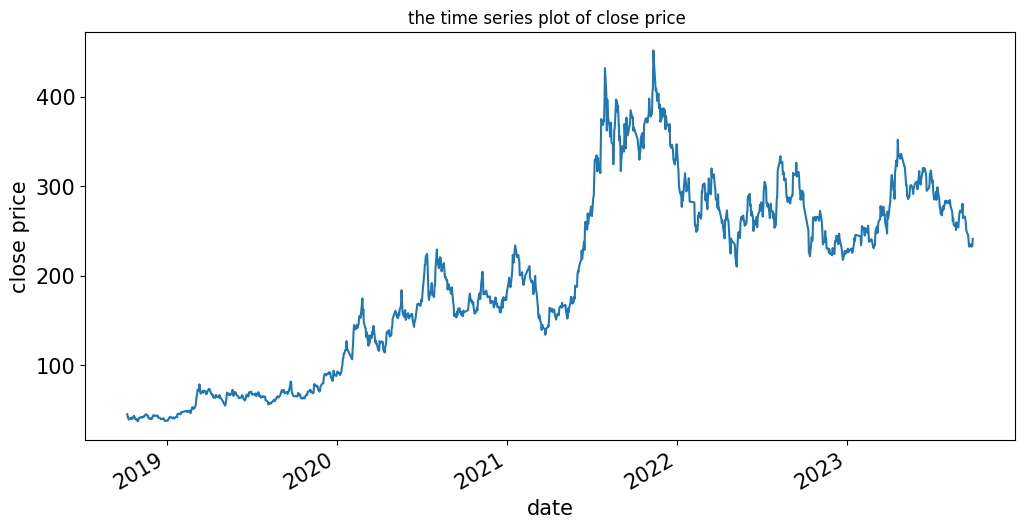

In [151]:
# (1)画出收盘价的时间序列图。（10分）

data['close'].plot(figsize=(12, 6), title='the time series plot of close price ', fontsize=15)
plt.xlabel('date', fontsize=15)
plt.ylabel('close price', fontsize=15)
plt.show()

In [152]:
# (2)将收盘价高于开盘价的交易日用1进行标注，其他用0进行标注，给数据增加标签列。（10分）
data['label'] = np.where(data['close'] > data['open'], 1, 0)
data.head(10)

,open,high,low,close,volume,label
date,,,,,,
2018-10-08,45.60,46.80,45.01,45.36,7250124,0
2018-10-09,45.69,46.17,40.85,41.98,13105888,0
2018-10-10,41.95,43.22,40.70,42.15,10102117,1
2018-10-11,39.99,41.50,38.05,39.23,12596210,0
2018-10-12,39.40,40.78,38.80,40.41,10078339,1
2018-10-15,40.41,42.00,40.08,40.32,8019456,0
2018-10-16,40.52,41.65,39.40,40.14,7949658,0
2018-10-17,41.00,41.54,38.80,41.49,12546496,1
2018-10-18,40.90,41.00,39.71,39.88,8367587,0


In [153]:
# (3)用收盘价计算日度收益率，增加日度收益率这个字段。对数据进行预处理，检查数据是否存在缺失值、无穷大值，将缺失值和无穷大值用0代替。（10分）
data['return'] = data['close'].pct_change()
print(data['return'].isin([np.inf, -np.inf]).sum())
# 从结果来看没有无穷值
print(data['return'].isnull().sum())
# 从结果来看有缺失值
data['return'].fillna(0, inplace=True)

0
1


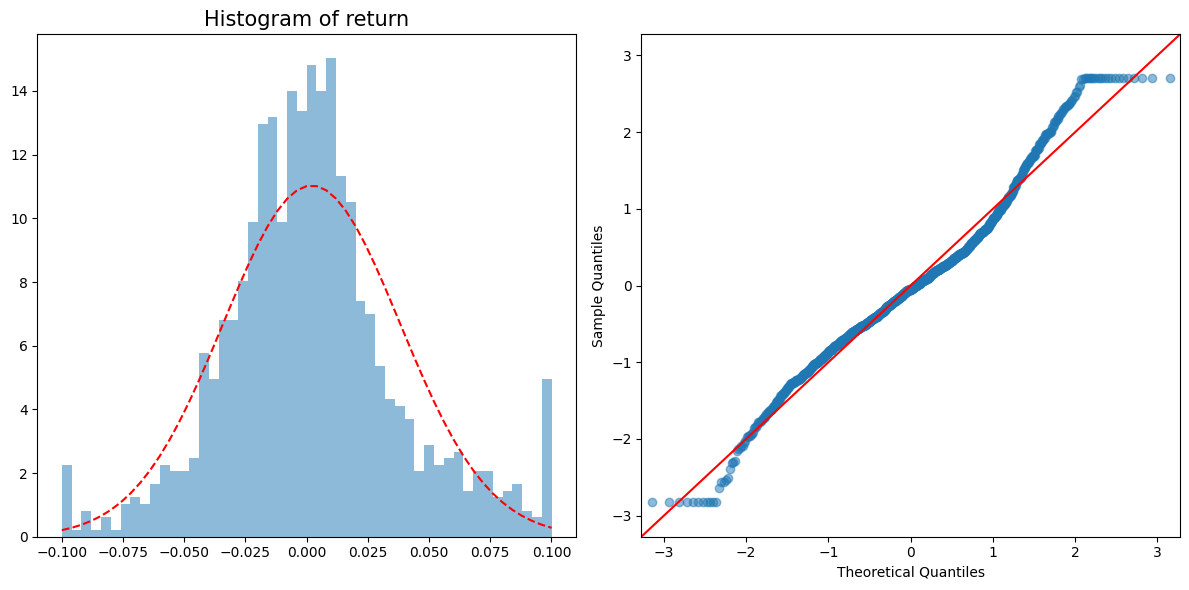

In [154]:
# (4)画出股票日度收益的直方图，分析股票收益分布的特征。（10分）
# 绘制直方图
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121)
bins=50
n,bins,patches = ax1.hist(data['return'],alpha=0.5, bins=bins, density=True,label='return')

# 绘制正态分布曲线
mean = data['return'].mean()
std = data['return'].std()
y = norm.pdf(bins, mean, std)
ax1.plot(bins, y, 'r--', label='normal distribution')
ax1.set_title('Histogram of return', fontsize=15)

# 绘制QQ图
import statsmodels.api as sm
ax2 = plt.subplot(122)
sm.qqplot((data['return']-mean)/std, ax=ax2, line='45',alpha=0.5)
plt.tight_layout()
plt.show()

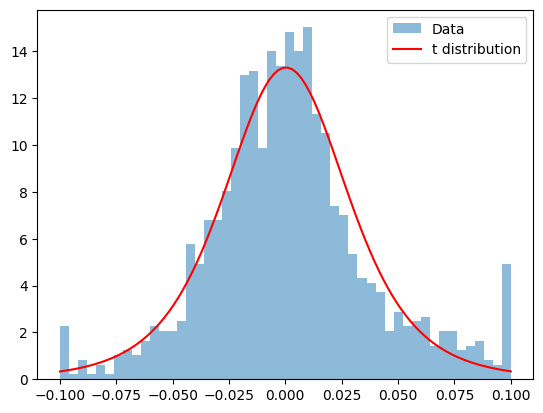

In [155]:
# 拟合t分布
params = stats.t.fit(data['return'])

# 生成t分布的概率密度函数 (PDF)
x = np.linspace(min(data['return']), max(data['return']), 100)
fitted_pdf = stats.t.pdf(x, *params)

# 绘制原始数据的直方图和拟合的t分布
plt.hist(data['return'], density=True, alpha=0.5, bins=bins, label='Data')
plt.plot(x, fitted_pdf, 'r-', label='t distribution')
plt.legend()

plt.show()

#### 从结果来看，收益分布更加倾向于t分布

In [156]:
'''
(5)	基于7:3的训练集/测试集切分，使用上一个交易日或以前信息，
分别用K近邻、决策树、朴素贝叶斯、人工神经网络对下一个交易日股票收盘价是否会高于开盘价进行预测，
将收盘价高于开盘价的交易日定义为正类，计算召回率、精度、准确率。
要求：除使用下载数据字段作为属性外，自己另外构建2个属性用于预测；说明超参数选择，用测试集展示预测效果。（40分）
'''
# 构建属性'放量情况'，'日内涨幅'，并处理缺失值和无穷值
data['volume_change'] = data['volume'].pct_change()
data['volume_change'].fillna(0, inplace=True)
data['volume_change'].replace([np.inf, -np.inf], 0, inplace=True)
data['close_open_change'] = (data['close'] - data['open']) / data['open']
data['close_open_change'].fillna(0, inplace=True)
data['close_open_change'].replace([np.inf, -np.inf], 0, inplace=True)
data.head()

,open,high,low,close,volume,label,return,volume_change,close_open_change
date,,,,,,,,,
2018-10-08,45.60,46.80,45.01,45.36,7250124,0,0.000000,0.000000,-0.005263
2018-10-09,45.69,46.17,40.85,41.98,13105888,0,-0.074515,0.807678,-0.081199
2018-10-10,41.95,43.22,40.70,42.15,10102117,1,0.004050,-0.229192,0.004768
2018-10-11,39.99,41.50,38.05,39.23,12596210,0,-0.069276,0.246888,-0.019005
2018-10-12,39.40,40.78,38.80,40.41,10078339,1,0.030079,-0.199891,0.025635


In [157]:
# 构建y
y = data['label'][1:]
# 构建X
X = data.drop(['label'], axis=1)[:-1]

In [158]:
# 划分训练集和测试集
# 时间序列数据不能随机划分，只能按照时间顺序划分
train_x = X[:int(len(X) * 0.7)]
train_y = y[:int(len(y) * 0.7)]
test_x = X[int(len(X) * 0.7):]
test_y = y[int(len(y) * 0.7):]

In [159]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

n = 15
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(train_x, train_y)
y_pred = knn.predict(test_x)
(y_pred == test_y).sum() / len(test_y)

0.521978021978022

In [160]:
# 决策树
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
y_pred = dtc.predict(test_x)
(y_pred == test_y).sum() / len(test_y)

0.49725274725274726

In [161]:
# 朴素贝叶斯
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x, train_y)
y_pred = gnb.predict(test_x)
(y_pred == test_y).sum() / len(test_y)

0.5027472527472527

In [162]:
# 人工神经网络
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='relu',learning_rate='adaptive',max_iter=1000,hidden_layer_sizes=(100,10))
mlp.fit(train_x, train_y)
y_pred = mlp.predict(test_x)
(y_pred == test_y).sum() / len(test_y)

0.4835164835164835